- Nama : Rizky Haffiyan Roseno
- Kelas : IF-43-09
- NIM : 1301194042

In [ ]:
#Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
#Mendownload File
!gdown --id 1Dhgp6r63pSeJxKCVL6q4FwmW4pGnV684

Downloading...
From: https://drive.google.com/uc?id=1Dhgp6r63pSeJxKCVL6q4FwmW4pGnV684
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 93.0MB/s]


In [ ]:
#Memasukan file ke dalam DataFrame
df_train = pd.read_csv('kendaraan_train.csv')
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


#INFO DAN STATISTIK DATA

In [ ]:
#Info dari data Kendaraan_train.csv
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#Statistik dari data Kendaraan_train.csv
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#Jumlah baris dan kolom pada data
df_train.shape

(285831, 12)

#PREPROCESSING

In [ ]:
#Mengecek missing value
null_data = df_train.isnull().sum()
print(null_data)

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [ ]:
#Mengecek data yang memiliki duplikat
duplicate = df_train.duplicated()
print('Jumlah Data yang Duplikat = %d' % (duplicate.sum()))

Jumlah Data yang Duplikat = 0


In [ ]:
#Membersihkan data dari missing value
df_train.dropna(inplace = True, axis = 0)
df_train.head

<bound method NDFrame.head of             id Jenis_Kelamin  ...  Lama_Berlangganan  Tertarik
0            1        Wanita  ...               97.0         0
1            2          Pria  ...              158.0         0
3            4        Wanita  ...               63.0         0
5            6          Pria  ...              171.0         0
8            9        Wanita  ...               31.0         0
...        ...           ...  ...                ...       ...
285826  285827        Wanita  ...              217.0         0
285827  285828        Wanita  ...               50.0         0
285828  285829        Wanita  ...              226.0         0
285829  285830          Pria  ...              270.0         0
285830  285831          Pria  ...               44.0         0

[171068 rows x 12 columns]>

In [ ]:
#Drop ID dan Tertarik untuk membuat index baru
df_train = df_train.drop(['id', 'Tertarik'], axis = 1)
df_train = df_train.reset_index(drop=True)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
3,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0
4,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0
...,...,...,...,...,...,...,...,...,...,...
171063,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
171064,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
171065,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
171066,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


In [ ]:
#Mengecek jumlah baris dan kolom setelah data dibersihkan
df_train.shape

(171068, 10)

In [ ]:
#Mengecek kolom yang ada missing value
df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
#Merubah tipe data objek menjadi numerikal
#Jenis Kelamin
df_train["Jenis_Kelamin"] = df_train["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0])
#Umur Kendaraan
df_train["Umur_Kendaraan"] = df_train["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [0,2,1])
#Kendaraan Rusak
df_train["Kendaraan_Rusak"] = df_train["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0])
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0
2,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0
3,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0
4,0,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0


***Keterangan:***
*   Jenis_Kelamin: 0 - Wanita, 1 - Pria
*   Umur_Kendaraan: 0 : "< 1 Tahun", 1 : "1-2 Tahun", 2 : "> 2 Tahun"
*   Kendaraan_Rusak: 0 : "Tidak, 1 : "Pernah"

In [ ]:
#Normalisasi data dengan MinMaxScaler
scale = MinMaxScaler()
df_train = pd.DataFrame(scale.fit_transform(df_train), columns=df_train.columns)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111
2,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391
3,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.037402,0.932099,0.557093
4,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.052380,0.981481,0.072664
...,...,...,...,...,...,...,...,...,...,...
171063,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263
171064,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408
171065,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405
171066,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654


Text(0.5, 1.1, 'Korelasi Antar Variabel Dengan Representasi Angka')

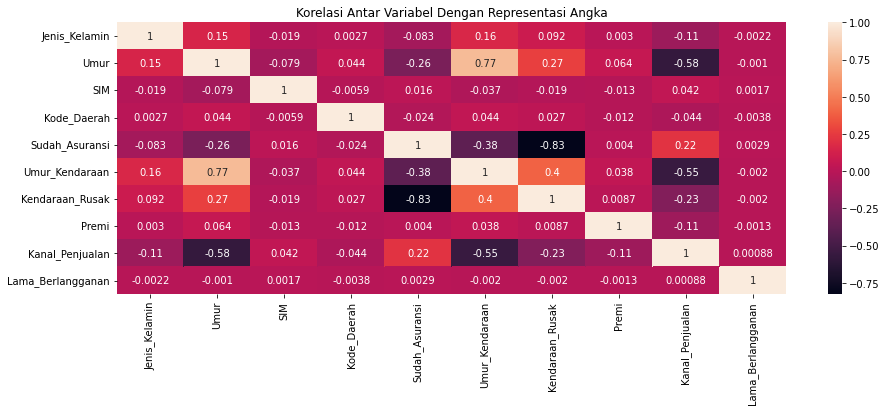

In [ ]:
#Membuat korelai data berdasarkan kolom / variabel
corel = df_train.corr()
plt.subplots(figsize=(15, 5))
sns.heatmap(corel, annot=True)
plt.title("Korelasi Antar Variabel Dengan Representasi Angka",y=1.1)

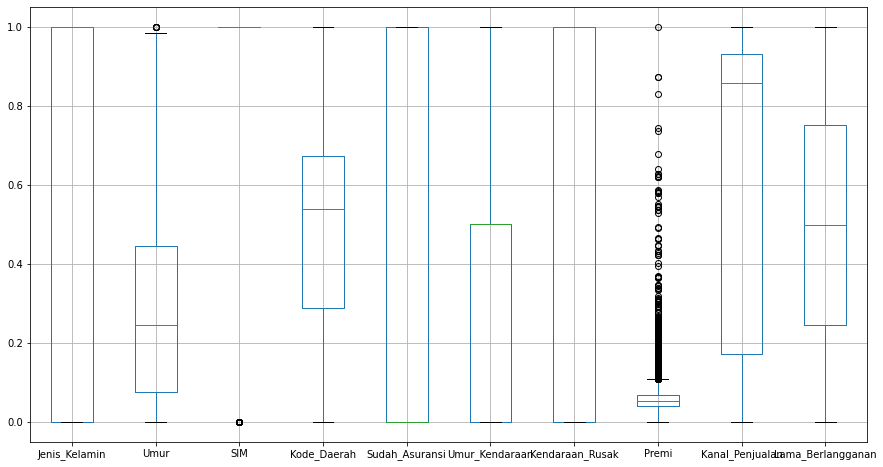

In [ ]:
#Menampilkan boxplot dari data, dan mengecek outlier
df_train.boxplot(figsize=[15,8])

In [ ]:
#Split Data untuk menentukan feature(Umur) dan target(Kanal_Penjualan)
df_trainX = df_train.iloc[:, [1,8]].values
df_trainX

array([[0.15384615, 0.93209877],
       [0.43076923, 0.17283951],
       [0.58461538, 0.75925926],
       ...,
       [0.04615385, 0.93209877],
       [0.73846154, 0.75925926],
       [0.38461538, 0.15432099]])

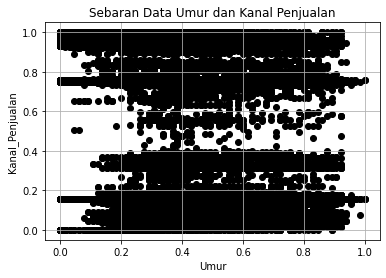

In [ ]:
#Visualisasi data sebaran dari Umur dan Kanal_Penjualan
plt.scatter(df_trainX[:,0],df_trainX[:,1], color='black')
plt.title("Sebaran Data Umur dan Kanal Penjualan")
plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.grid(True)

In [ ]:
#Fungai untuk untuk mencari outlier
def cari_outlier(df_train):
  Q1 = df_train.quantile(0.25)
  Q3 = df_train.quantile(0.75)
  IQR = Q3-Q1
  df_trainF = df_train[(df_train<(Q1-(1.5*IQR))) | (df_train>(Q3+(1.5*IQR)))]
  return df_trainF

In [ ]:
#Menampilkan Outlier yang ada pada kolom Umur
print(cari_outlier(df_train['Umur']))

20873     1.0
30216     1.0
38073     1.0
76005     1.0
169894    1.0
Name: Umur, dtype: float64


In [ ]:
#Menghapus Outlier pada kolom Umur
Q1 = df_train['Umur'].quantile(0.25)
Q3 = df_train['Umur'].quantile(0.75)
IQR  = Q3-Q1
df_train = df_train[~(df_train['Umur']>(Q1-(1.5*IQR))) | (df_train['Umur']<(Q3+(1.5*IQR)))]

In [ ]:
#Menghapus Outlier pada kolom Premi
Q1 = df_train['Premi'].quantile(0.25)
Q3 = df_train['Premi'].quantile(0.75)
IQR  = Q3-Q1
df_train = df_train[~(df_train['Premi']>(Q1-(1.5*IQR))) | (df_train['Premi']<(Q3+(1.5*IQR)))]
df_train.reset_index(drop=True, inplace=True)

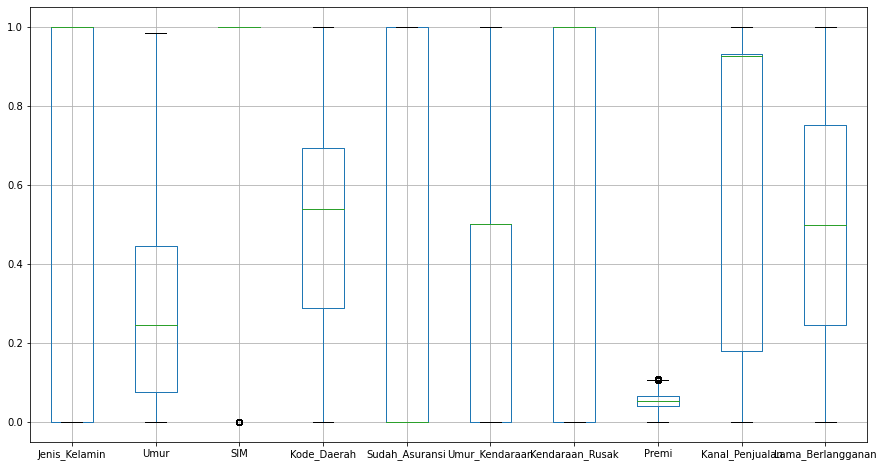

In [ ]:
#Menampilkan Boxplot dari kolom Umur dan memastikan Outlier sudah dihapus 
df_train.boxplot(figsize=[15,8])

In [ ]:
#Membuat dataframe untuk mengecek feature dan target yang dipilih
df_selected = df_train[['Umur', 'Kanal_Penjualan']]
df_selected

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.584615,0.759259
3,0.015385,0.932099
4,0.000000,0.981481
...,...,...
166387,0.046154,0.932099
166388,0.015385,0.932099
166389,0.046154,0.932099
166390,0.738462,0.759259


In [ ]:
#Jumlah baris dan kolom (Umur dan Kanal_penjualan)
df_selected.shape

(166392, 2)

In [ ]:
#Jumlah baris dan kolom dari data yang dibersihkan
df_train.shape

(166392, 10)

In [ ]:
#Mendownload data yang sudah di Bersihkan
df_train.to_csv('kendaraan_train_new.csv')

#CLUSTERING MENGGUNAKAN K-MEANS

#Pemodelan

In [ ]:
#Fungsi Menghitung Jarak Euclidean
def euclidean(x1, x2):
  return (sum((x1 - x2)**2))**0.5

In [ ]:
#Fungsi untuk menentukan cluster pada setiap data
def clustering(centroids, arr_cluster):
  clusters = []
  for i in range(len(arr_cluster)):#Looping sebanyak jumlah baris
    jarak = []
    for centroid in centroids:#Looping sebanyak jumlah centroid sesuai dengan nilai K
      jarak.append(euclidean(centroid, arr_cluster[i]))#Menghitung Jarak dari setiap data dengan seluruh Centroid
    jarak_min = [x for x, val in enumerate(jarak) if val == min(jarak)]#Mencari centroid terdekat
    clusters.append(jarak_min[0])#Menentukan cluster
  return np.array(clusters)

In [ ]:
#Fungsi untuk menentukan centroid baru untuk setiap cluster
def new_centroids(clusters, arr_cluster):
  centroids_baru = []
  df_cluster = pd.concat([pd.DataFrame(arr_cluster), pd.DataFrame(clusters, columns=['cluster'])], axis=1)#Menggabungkan DataFrame
  for c in set(df_cluster['cluster']):#Looping sebanyak jumlah cluster pada kolom cluster dataframe.
    curr_cluster = df_cluster[df_cluster['cluster']==c][df_cluster.columns[:-1]]
    mean_cluster = curr_cluster.mean(axis=0)#Mencari Mean dari Cluster
    centroids_baru.append(mean_cluster)#Mean menjadi centroid baru dalam Cluster
  return np.array(centroids_baru)

Main Program K-Means

In [ ]:
K = 2 #Menentukan Jumlah Cluster
first_centroid = np.random.choice(len(df_trainX), K, replace=True)
centroids = df_trainX[first_centroid, :] #Merandom Centroid awal
clusters = clustering(centroids, df_trainX) #Menentukan Cluster berdasarkan centroid Awal
for i in range(20): #Loop untuk mengulangi penentuan centroid dan cluster
  centroids = new_centroids(clusters, df_trainX)
  clusters = clustering(centroids, df_trainX) 

Visualisasi

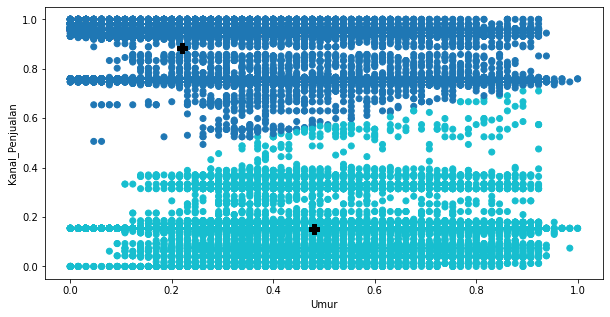

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_trainX[:,0],y=df_trainX[:,1], 
              c=clusters, cmap=plt.cm.tab10);
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='black', marker='P', s=100);
plt.xlabel('Umur')
plt.ylabel('Kanal_Penjualan');

#EVALUASI ELBOW METHOD

<function matplotlib.pyplot.show>

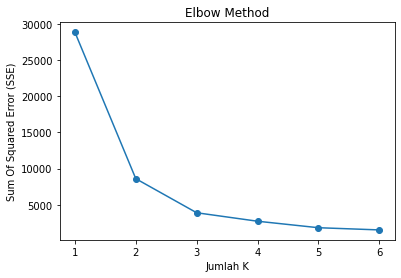

In [ ]:
#Elbow Method
SSE = []
for i in range(1,7):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_trainX)
    SSE.append(k_means.inertia_)
plt.xlabel('Jumlah K')
plt.title('Elbow Method')
plt.ylabel('Sum Of Squared Error (SSE)')
plt.plot(range(1,7),SSE,marker='o')
plt.show

#EKSPERIMEN

In [ ]:
K = 3 #Menentukan Jumlah Cluster
first_centroid = np.random.choice(len(df_trainX), K, replace=True)
centroids = df_trainX[first_centroid, :] #Merandom Centroid awal
clusters = clustering(centroids, df_trainX) #Menentukan Cluster berdasarkan centroid Awal
for i in range(20): #Loop untuk mengulangi penentuan centroid dan cluster
  centroids = new_centroids(clusters, df_trainX)
  clusters = clustering(centroids, df_trainX) 

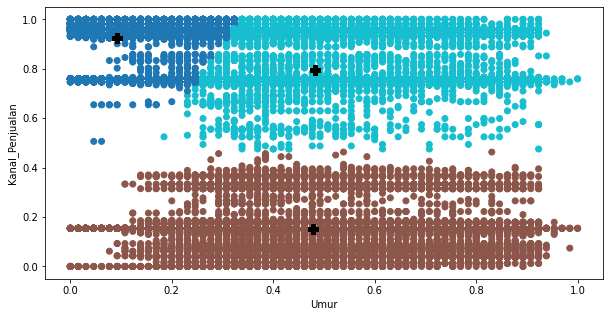

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_trainX[:,0],y=df_trainX[:,1], 
              c=clusters, cmap=plt.cm.tab10);
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='black', marker='P', s=100);
plt.xlabel('Umur')
plt.ylabel('Kanal_Penjualan');

In [ ]:
K = 4 #Menentukan Jumlah Cluster
first_centroid = np.random.choice(len(df_trainX), K, replace=True)
centroids = df_trainX[first_centroid, :] #Merandom Centroid awal
clusters = clustering(centroids, df_trainX) #Menentukan Cluster berdasarkan centroid Awal
for i in range(20): #Loop untuk mengulangi penentuan centroid dan cluster
  centroids = new_centroids(clusters, df_trainX)
  clusters = clustering(centroids, df_trainX) 

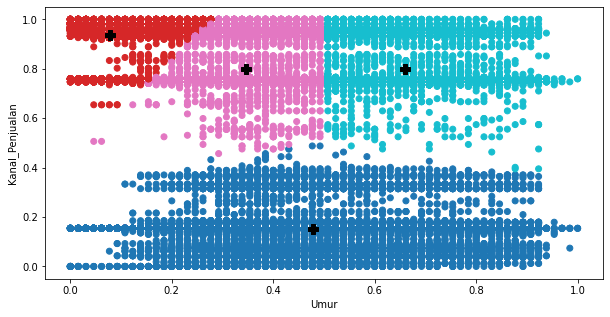

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_trainX[:,0],y=df_trainX[:,1], 
              c=clusters, cmap=plt.cm.tab10);
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='black', marker='P', s=100);
plt.xlabel('Umur')
plt.ylabel('Kanal_Penjualan');

In [ ]:
K = 5 #Menentukan Jumlah Cluster
first_centroid = np.random.choice(len(df_trainX), K, replace=True)
centroids = df_trainX[first_centroid, :] #Merandom Centroid awal
clusters = clustering(centroids, df_trainX) #Menentukan Cluster berdasarkan centroid Awal
for i in range(20): #Loop untuk mengulangi penentuan centroid dan cluster
  centroids = new_centroids(clusters, df_trainX)
  clusters = clustering(centroids, df_trainX) 

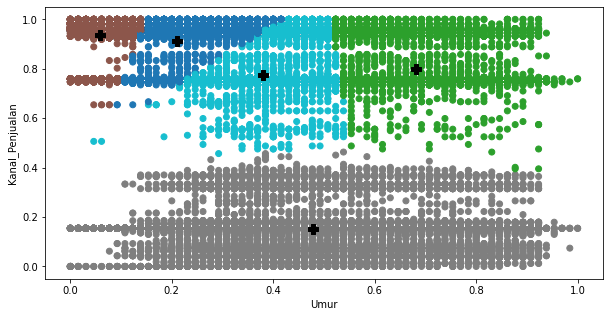

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_trainX[:,0],y=df_trainX[:,1], 
              c=clusters, cmap=plt.cm.tab10);
plt.scatter(x=centroids[:,0], y=centroids[:,1], color='black', marker='P', s=100);
plt.xlabel('Umur')
plt.ylabel('Kanal_Penjualan');